load feature dataframe

In [130]:
from pathlib import Path
import pandas as pd

path=Path(r"Q:\carspi\ETiX_Output\240304_normalized_per_embryo.csv")
df = pd.read_csv(path)

In [50]:
df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Mean,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6
0,106,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.114605,0.760254,0.000000,...,1.000000,0.211959,0.000000,1.000000,0.735855,0.276465,0.044038,0.015196,0.095851,0.716935
1,106,1,0.031236,0.028534,0.063624,0.021482,0.053010,0.122546,0.803173,0.039182,...,0.943347,0.000000,0.107740,0.724641,0.851554,0.145731,0.000000,0.000000,0.000000,0.638119
2,106,2,0.053858,0.051619,0.096926,0.046145,0.035734,0.000000,0.796070,0.067064,...,0.906546,0.065787,0.174341,0.673168,0.679285,0.105496,0.035687,0.035458,0.143748,0.718206
3,106,3,0.106825,0.101035,0.220557,0.068278,0.216736,0.056143,0.907362,0.130825,...,0.882052,0.167436,0.205949,0.684941,0.603006,0.711498,0.076481,0.175241,0.120750,0.677391
4,106,4,0.134886,0.124229,0.303308,0.066895,0.312040,0.074481,1.000000,0.163794,...,0.812100,0.537011,0.307575,0.753712,0.043794,0.718400,0.151822,0.128924,0.472592,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.806237,0.792647,0.992649,0.705172,0.734852,0.892561,0.740625,0.832137,...,0.304997,0.954173,0.801975,0.344218,0.922344,0.398290,0.271825,0.231381,0.652008,0.087308
2802,99,19,0.843563,0.835052,0.939496,0.800791,1.000000,0.835501,0.443354,0.865189,...,0.160838,0.893317,0.908772,0.159745,1.000000,0.044025,0.531355,0.289838,0.350887,0.071828
2803,99,20,0.886974,0.860882,0.959869,0.847229,0.751697,0.977619,0.365459,0.903187,...,0.155657,0.802633,0.909544,0.126657,0.879829,0.651441,0.416775,0.363472,0.621485,0.079100
2804,99,21,0.936324,0.909666,1.000000,0.888469,0.835003,1.000000,0.335105,0.945825,...,0.082498,1.000000,0.957212,0.125236,0.491946,0.507579,0.542876,1.000000,0.687321,0.319533


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


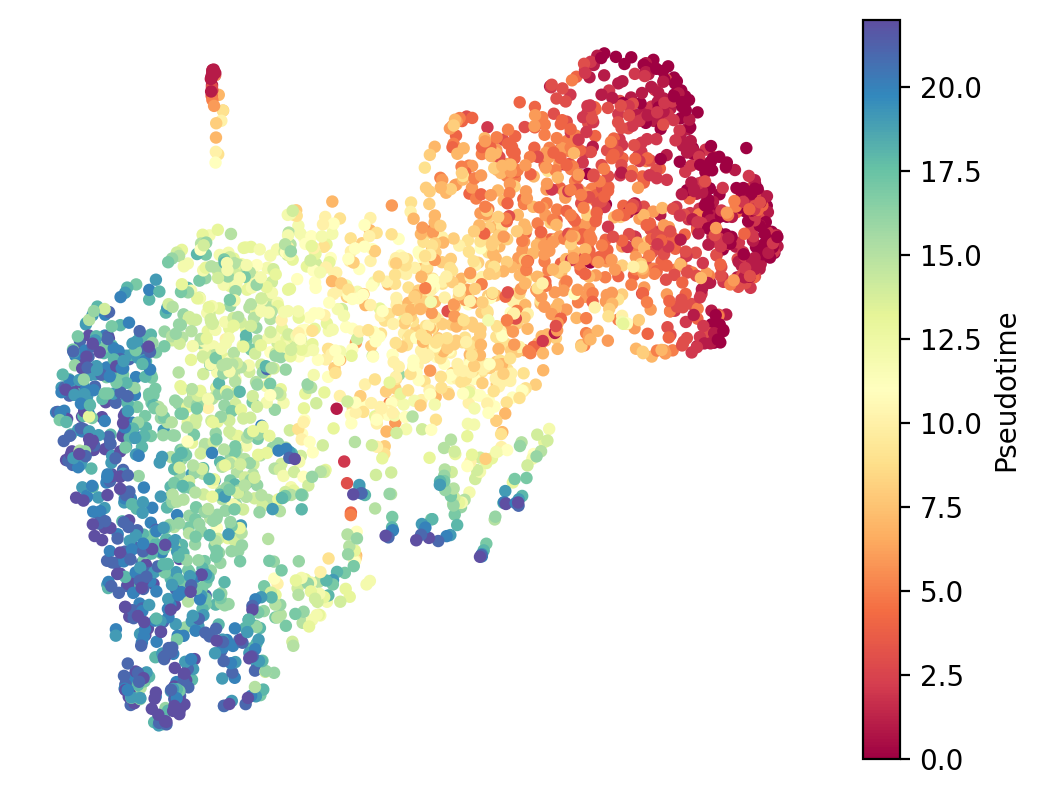

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap

subset_df = df.copy()
subset_df = subset_df.drop('timepoint', axis=1)
subset_df = subset_df.drop('embryo ID', axis=1)

#UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  # You can adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df= pd.DataFrame()


UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
#UMAP_df['KMeans'] = kmeans_labels

UMAP_df['timepoint'] = df['timepoint'] #add zscore feature you want to visualize from timepoint_zscored_df

# Visualize UMAP and K-means clusters if needed
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatterplot
fig, ax = plt.subplots(dpi=200)
sc = ax.scatter(UMAP_df['UMAP_1'], UMAP_df['UMAP_2'], c=UMAP_df['timepoint'], cmap='Spectral', s=12)

# Add labels to axes
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

ax.axis('off')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Pseudotime')

plt.title('')
plt.show()


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


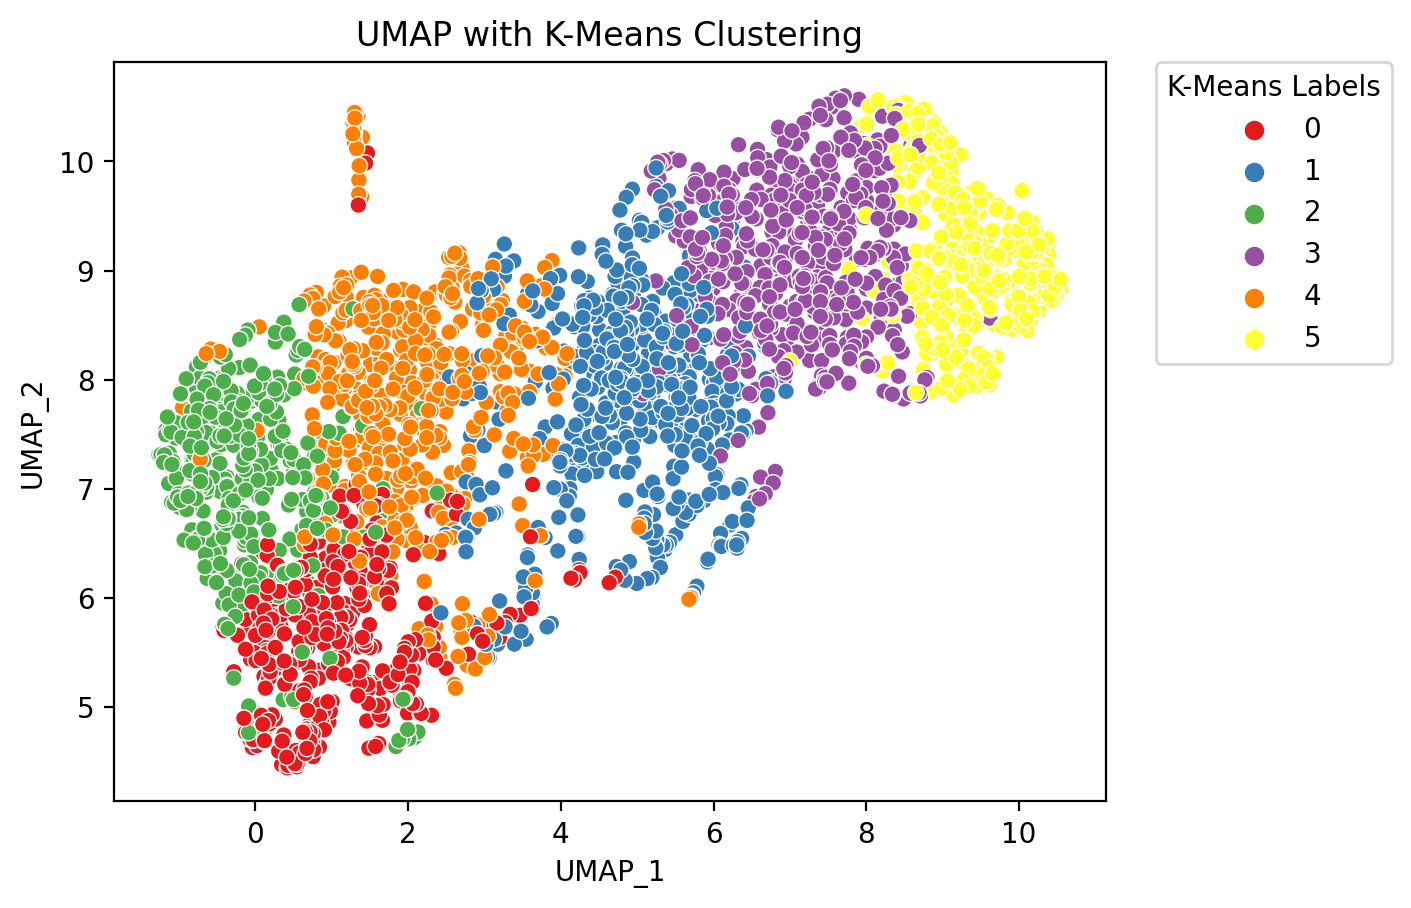

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap

subset_df = df.copy()
subset_df = subset_df.drop('timepoint', axis=1)
subset_df = subset_df.drop('embryo ID', axis=1)

#UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  # You can adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df= pd.DataFrame()


UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans'] = kmeans_labels

#UMAP_df['solidity'] = df['solidity'] #add zscore feature you want to visualize from timepoint_zscored_df

# Visualize UMAP and K-means clusters if needed
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(dpi=200)

sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='KMeans', data=UMAP_df, palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='K-Means Labels', ncol=1)
plt.title('UMAP with K-Means Clustering')
plt.show()


clustrs at last tp

In [ ]:
normalized_df

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap

subset_df = normalized_df[normalized_df['timepoint'] ==0] #select timepoint you want to plot, or alternatively skip this line to plot all timepoints, and visualize the timepoints
subset_df = subset_df.drop('timepoint', axis=1)
subset_df = subset_df.drop('embryo ID', axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  # You can adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df=pd.DataFrame()

UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = kmeans_labels

#UMAP_df['area'] = normalized_df['area'] #add zscore feature you want to visualize from timepoint_zscored_df

# Visualize UMAP and K-means clusters if needed
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(dpi=200)

sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='KMeans_Labels', data=UMAP_df, palette='viridis')
plt.title('KMeans_Labels, t=0')
plt.show()


In [109]:
path=Path(r"Q:\carspi\ETiX_Output\240304_normalized_per_timepoint.csv")
df = pd.read_csv(path)

In [110]:
df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Mean,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.784831,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.923943,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.874962,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.869475,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.833982,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.673715,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.621009,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.608688,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.581448,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687


plot last timepoint clusters

In [22]:
path=Path(r"Q:\carspi\ETiX_Output\240304_normalized_per_timepoint.csv")
df = pd.read_csv(path)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap

subset_df = df[df['timepoint']==22]

subset_df = subset_df.drop('timepoint', axis=1)
subset_df = subset_df.drop('embryo ID', axis=1)
subset_df= subset_df.drop(['clusters_endpoint'], axis=1)

#UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)


UMAP_df= pd.DataFrame()

UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = df['clusters_endpoint']

UMAP_df['timepoint'] = df['timepoint'] #add zscore feature you want to visualize from timepoint_zscored_df

# Visualize UMAP and K-means clusters if needed
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(dpi=200)

sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='KMeans_Labels', data=UMAP_df, palette='viridis')
plt.title('UMAP with KMeans Clustering')
plt.show()


KeyError: "['clusters_endpoint'] not found in axis"

Dynamic UMAP visualization

In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans
import pandas as pd 

subset_df = df[df['timepoint'] ==22] #select timepoint you want to plot, or alternatively skip this line to plot all timepoints, and visualize the timepoints
subset_df = subset_df.drop('timepoint', axis=1)
subset_df = subset_df.drop('embryo ID', axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(subset_df)

UMAP_df = pd.Dataframe()

UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['']


# Create an interactive scatter plot with color-coded clusters and sample IDs
fig = px.scatter(subset_df, x='UMAP_1', y='UMAP_2', color='clusters_per_timepoint', hover_data=['embryo ID'])
fig.update_layout(title='UMAP with K-means Clustering and Sample IDs')
fig.show()


In [135]:
path=Path(r"Q:\carspi\ETiX_Output\240304_endpoint_clusters.csv")
df2 = pd.read_csv(path)

In [138]:
path=Path(r"Q:\carspi\ETiX_Output\240304_normalized_per_embryo.csv")
df = pd.read_csv(path)

In [136]:
df2

,Unnamed: 0,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


In [137]:
df2.drop('Unnamed: 0', axis=1)

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


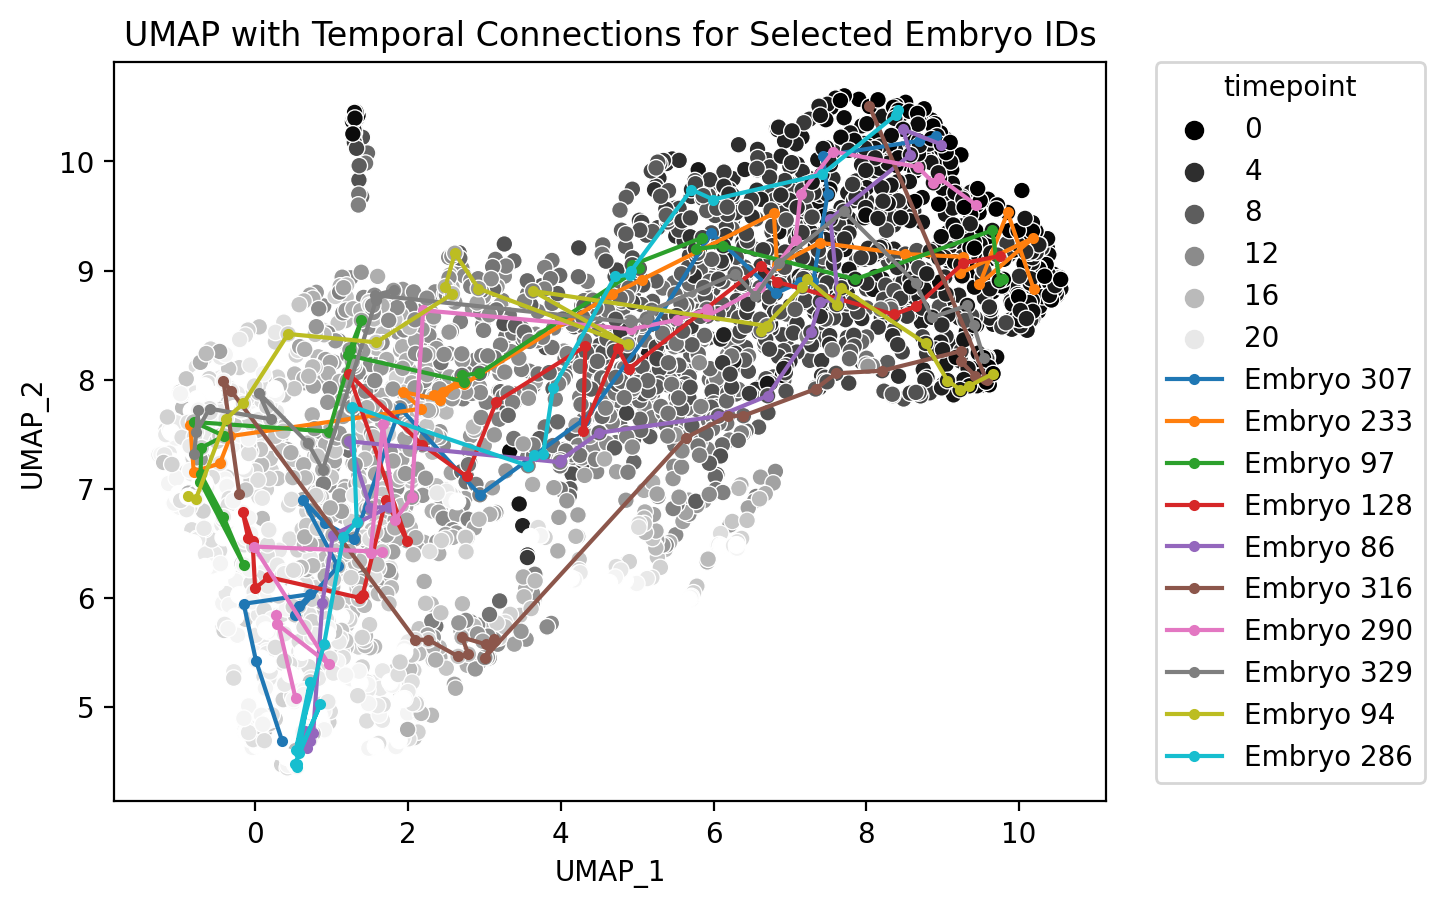

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

subset_df = df.copy()
subset_df = subset_df.drop(['timepoint', 'embryo ID'], axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df = pd.DataFrame()
UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = kmeans_labels

UMAP_df['timepoint'] = df['timepoint']
UMAP_df['embryo ID'] = df['embryo ID']

# Visualize UMAP and K-means clusters
fig, ax = plt.subplots(dpi=200)

sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='timepoint', data=UMAP_df, palette='gray', ax=ax)

# Plot lines connecting consecutive time points for the first 50 embryo IDs
selected_embryo_ids = np.random.choice(UMAP_df['embryo ID'].unique(), size=10, replace=False)
for embryo in selected_embryo_ids:
    embryo_data = UMAP_df[UMAP_df['embryo ID'] == embryo]
    sorted_data = embryo_data.sort_values('timepoint')
    ax.plot(sorted_data['UMAP_1'], sorted_data['UMAP_2'], marker='.', linestyle='-', label=f'Embryo {embryo}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='timepoint', ncol=1)
plt.title('UMAP with Temporal Connections for Selected Embryo IDs')
plt.show()

In [123]:
UMAP_df

,UMAP_1,UMAP_2,timepoint,embryo ID
0,-1.360864,-13.320016,0,106
1,-1.354449,-13.325007,1,106
2,-1.333022,-13.344818,2,106
3,-1.340381,-13.335789,3,106
4,-1.340614,-13.335211,4,106
...,...,...,...,...
2801,15.977075,-11.431504,18,99
2802,15.952285,-11.447300,19,99
2803,15.951502,-11.448459,20,99
2804,15.965358,-11.443830,21,99


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


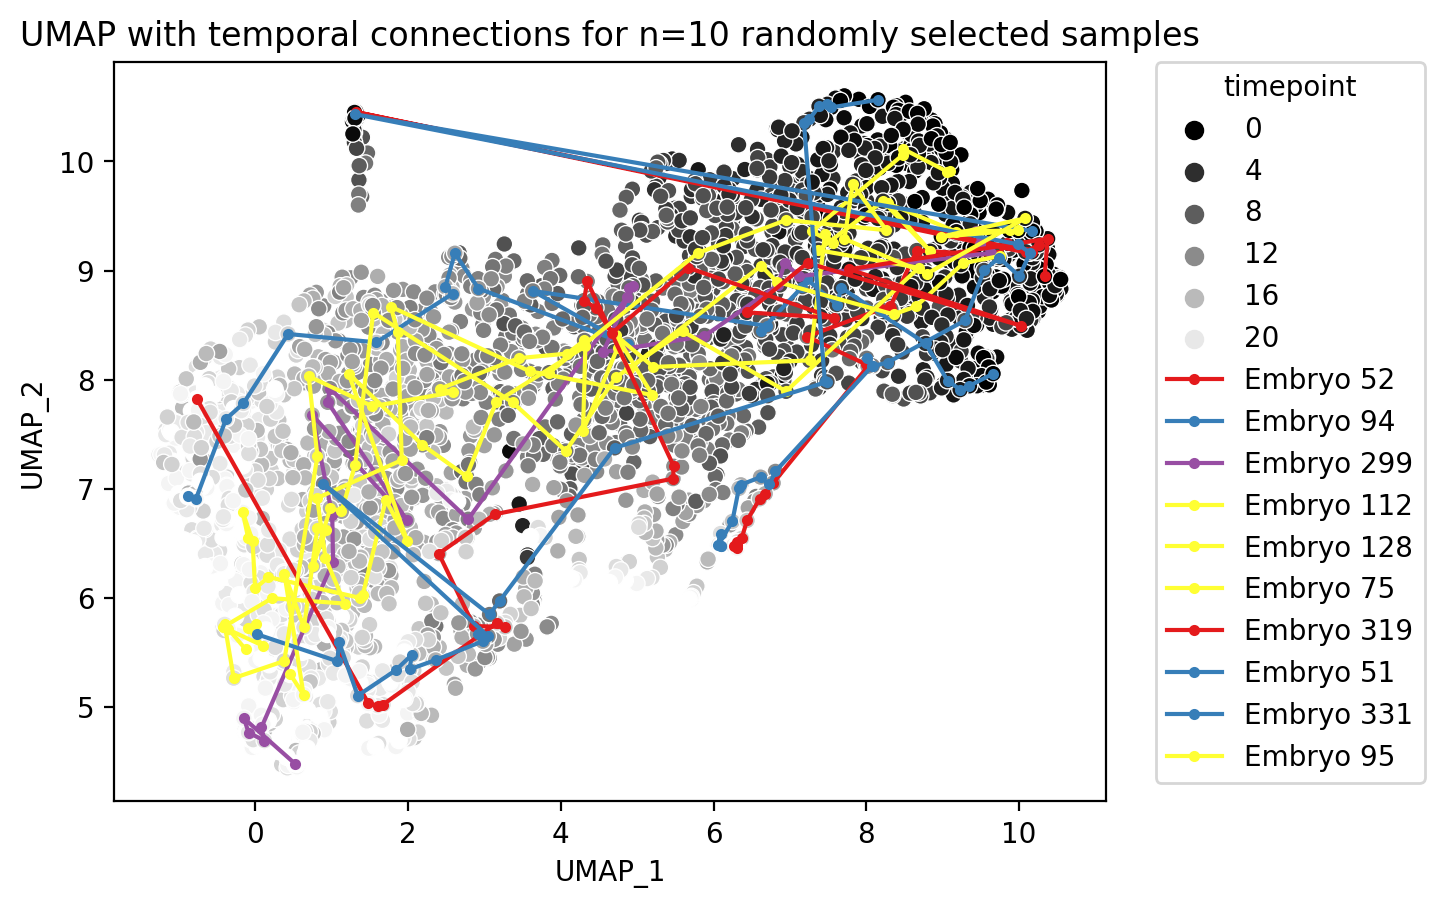

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

subset_df = df.copy()
subset_df = subset_df.drop(['timepoint', 'embryo ID'], axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df = pd.DataFrame()
UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = kmeans_labels

UMAP_df['timepoint'] = df['timepoint']
UMAP_df['embryo ID'] = df['embryo ID']
UMAP_df['endpoint clusters']=df2['endpoint clusters']
# Visualize UMAP and K-means clusters
fig, ax = plt.subplots(dpi=200)

sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='timepoint', data=UMAP_df, palette='gray', ax=ax)

# Plot lines connecting consecutive time points for the randomly selected embryo IDs
selected_embryo_ids = np.random.choice(UMAP_df['embryo ID'].unique(), size=10, replace=False)

for embryo in selected_embryo_ids:
    embryo_data = UMAP_df[UMAP_df['embryo ID'] == embryo].sort_values('timepoint')
    line_color = embryo_data[embryo_data['timepoint'] == 22]['endpoint clusters'].values[0]
    ax.plot(embryo_data['UMAP_1'], embryo_data['UMAP_2'], marker='.', linestyle='-', label=f'Embryo {embryo}', color=plt.cm.Set1(line_color / 5.0))

# Add color legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='timepoint', ncol=1)

plt.title('UMAP with temporal connections for n=10 randomly selected samples')
plt.show()


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


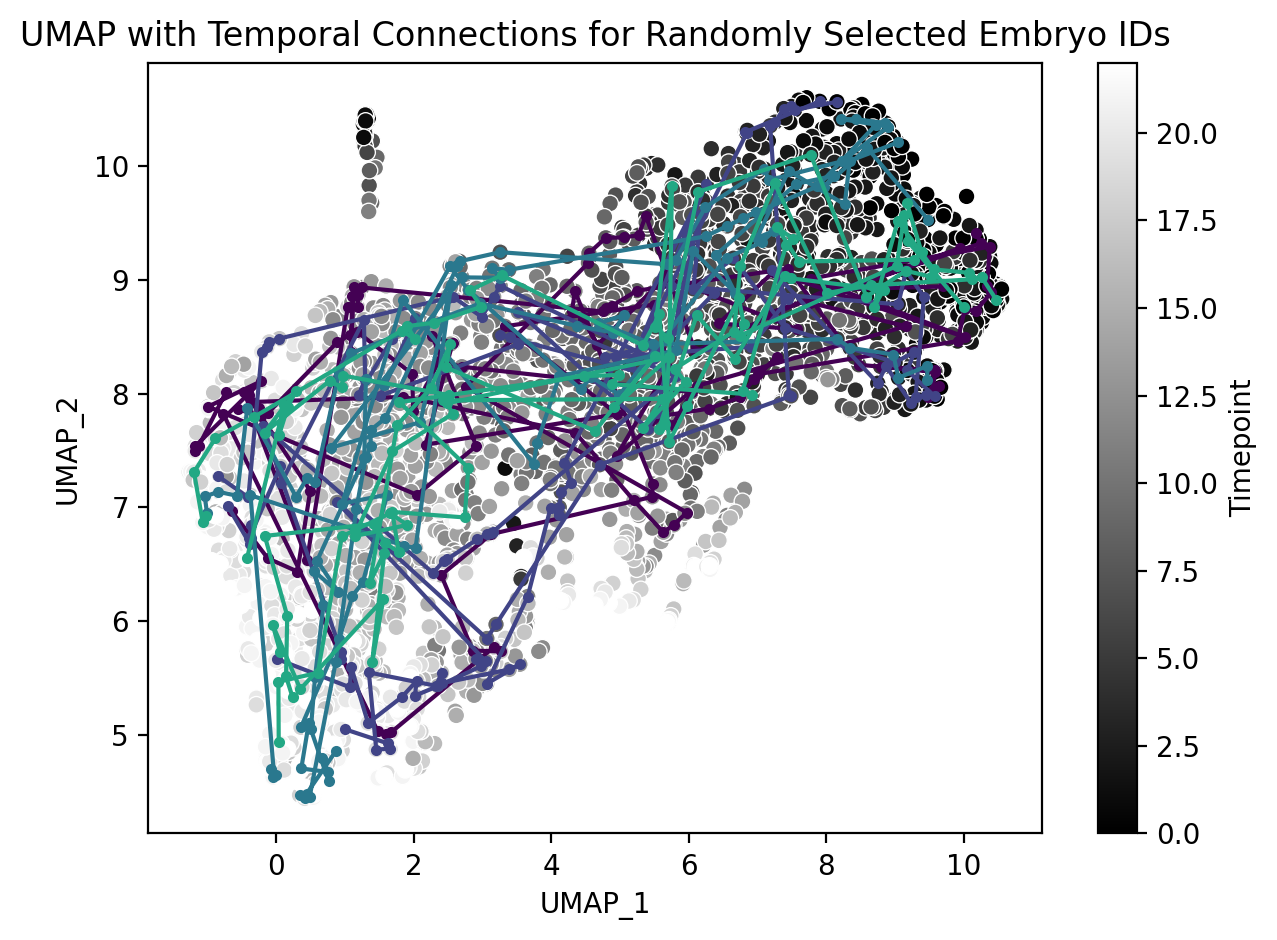

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

subset_df = df.copy()
subset_df = subset_df.drop(['timepoint', 'embryo ID'], axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df = pd.DataFrame()
UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = kmeans_labels

UMAP_df['timepoint'] = df['timepoint']
UMAP_df['embryo ID'] = df['embryo ID']
UMAP_df['endpoint clusters'] = df2['endpoint clusters']

# Visualize UMAP and k-means clusters
fig, ax = plt.subplots(dpi=200)

# Plot all data points in gray in the background on UMAP
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='timepoint', data=UMAP_df, palette='gray', ax=ax)

# Group embryos by 'endpoint clusters'
grouped_embryos = UMAP_df.groupby('endpoint clusters')['embryo ID'].unique()

# Select 10 random embryos from each cluster
selected_embryo_ids = []
for cluster, embryos in grouped_embryos.items():
    if len(embryos) >= 5:
        selected_embryo_ids.extend(np.random.choice(embryos, size=5, replace=False))
    else:
        selected_embryo_ids.extend(embryos)

# Plot lines connecting consecutive time points for the selected embryo IDs
for embryo in selected_embryo_ids:
    embryo_data = UMAP_df[UMAP_df['embryo ID'] == embryo].sort_values('timepoint')
    line_color = embryo_data[embryo_data['timepoint'] == 22]['endpoint clusters'].values[0]
    ax.plot(embryo_data['UMAP_1'], embryo_data['UMAP_2'], marker='.', linestyle='-', label=f'Embryo {embryo}', color=plt.cm.viridis(line_color / 5.0))

# Add legend for embryos on the left side
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys(), loc='upper left', borderaxespad=0., title='Embryos', ncol=1, bbox_to_anchor=(1.35, 1))

# Add color bar legend for timepoints on the right side
sm = plt.cm.ScalarMappable(cmap='gray', norm=plt.Normalize(vmin=UMAP_df['timepoint'].min(), vmax=UMAP_df['timepoint'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Timepoint')

plt.title('UMAP with Temporal Connections for Randomly Selected Embryo IDs')
plt.tight_layout()  # Adjust layout to prevent overlapping
ax.legend().set_visible(False)
plt.show()


c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


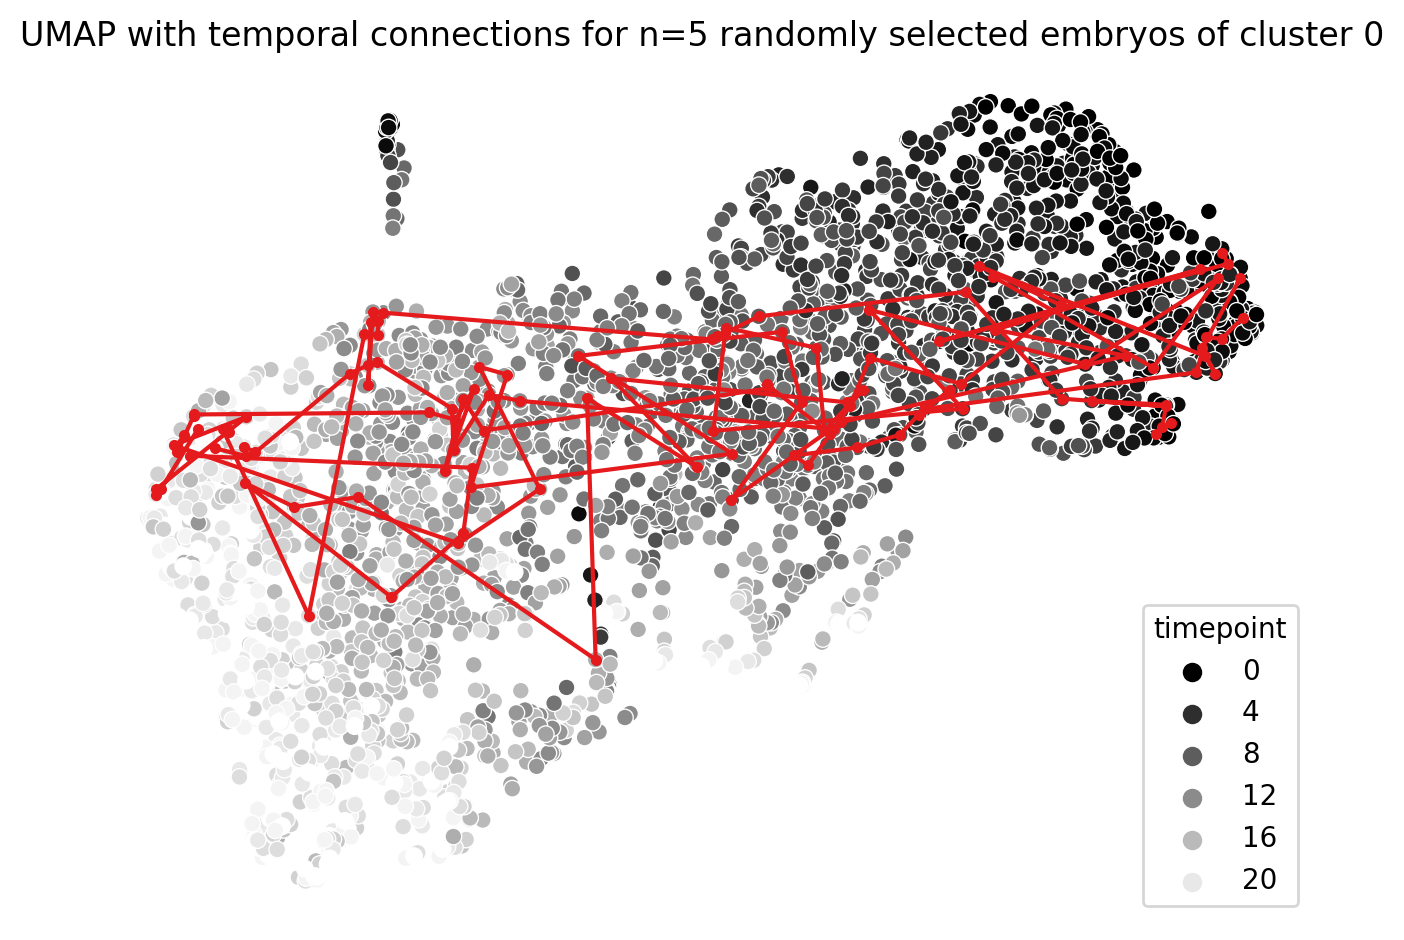

In [239]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming df is your original dataframe

subset_df = df.copy()
subset_df = subset_df.drop(['timepoint', 'embryo ID'], axis=1)

# UMAP transformation
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(subset_df)

# K-means clustering
kmeans = KMeans(n_clusters=6)  
kmeans_labels = kmeans.fit_predict(subset_df)

UMAP_df = pd.DataFrame()
UMAP_df['UMAP_1'] = umap_result[:, 0]
UMAP_df['UMAP_2'] = umap_result[:, 1]
UMAP_df['KMeans_Labels'] = kmeans_labels

UMAP_df['timepoint'] = df['timepoint']
UMAP_df['embryo ID'] = df['embryo ID']
UMAP_df['endpoint clusters'] = df2['endpoint clusters']

# Visualize UMAP and k-means clusters
fig, ax = plt.subplots(dpi=200)

# Plot all data points in gray in the background on UMAP
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='timepoint', data=UMAP_df, palette='gray', ax=ax)

# Specify the cluster from which you want to select embryos
specified_cluster = 0

# Select 10 random embryos from the specified cluster
embryos_in_cluster = UMAP_df[UMAP_df['endpoint clusters'] == specified_cluster]['embryo ID'].unique()
selected_embryo_ids = np.random.choice(embryos_in_cluster, size=5, replace=False)

# Plot lines connecting consecutive time points for the selected embryo IDs
for embryo in selected_embryo_ids:
    embryo_data = UMAP_df[UMAP_df['embryo ID'] == embryo].sort_values('timepoint')
    line_color = embryo_data[embryo_data['timepoint'] == 22]['endpoint clusters'].values[0]
    ax.plot(embryo_data['UMAP_1'], embryo_data['UMAP_2'], marker='.', linestyle='-', label=f'Embryo {embryo}', color=plt.cm.Set1(line_color / 5.0))

# Manually create legend for embryos with line colors
#legend_elements = [Line2D([0], [0], color=plt.cm.viridis(line_color / 5.0), marker='o', linestyle='', label=f'Embryo {embryo}') for embryo in selected_embryo_ids]
#ax.legend(handles=legend_elements, loc='upper left', borderaxespad=0., title='Embryos', ncol=1, bbox_to_anchor=(1.30, 1))

# Add color bar legend for timepoints on the right side
#sm = plt.cm.ScalarMappable(cmap='gray', norm=plt.Normalize(vmin=UMAP_df['timepoint'].min(), vmax=UMAP_df['timepoint'].max()))
#sm.set_array([])
#cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
#cbar.set_label('Timepoint')

ax.axis('off')
plt.title('UMAP with temporal connections for n=5 randomly selected embryos of cluster 0')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
